<a href="https://colab.research.google.com/github/AryanChaks/ImageClassifier/blob/main/koshish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
def draw_box(image, bbox, class_name):
    # get the box coordinates
    xmin, ymin, xmax, ymax = bbox

    # draw the box and class name on the image
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                                       linewidth=1, edgecolor='r', facecolor='none'))
    plt.gca().text(xmin, ymin-2, class_name, bbox=dict(facecolor='red', alpha=0.5),
                   fontsize=10, color='white')

In [6]:
def visualize_dataset(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = images[i]
        label = labels[i][0]
        class_name = class_names[label]
        draw_box(image, (0, 0, 32, 32), class_name)
    plt.show()

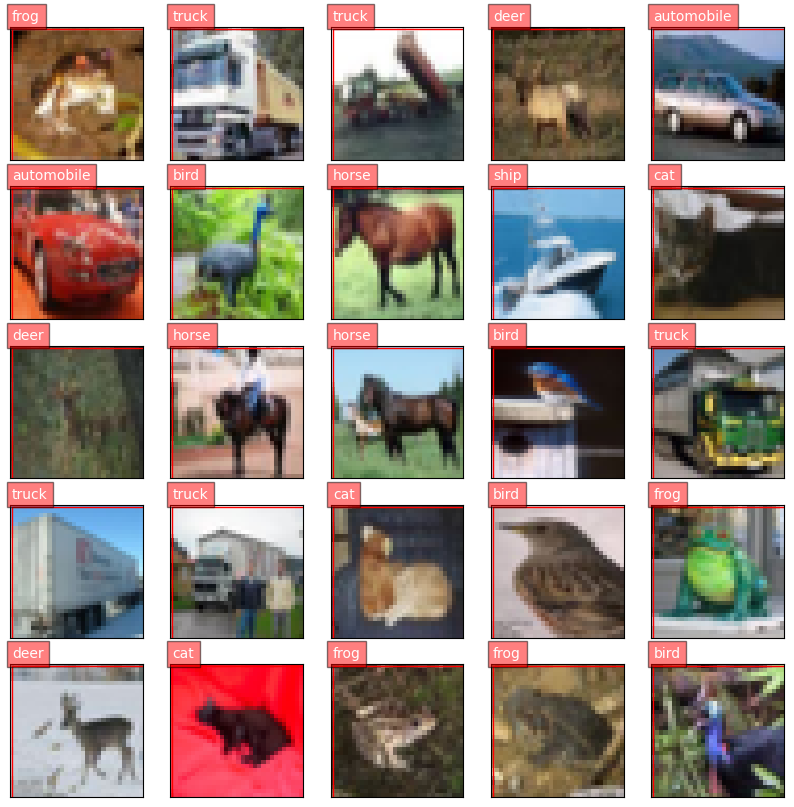

In [7]:
visualize_dataset(x_train, y_train)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
predictions = model.predict(x_test)

Epoch 1/10
1563/1563 [==============================] - 23s 5ms/step - loss: 1.5579 - accuracy: 0.4295 - val_loss: 1.3349 - val_accuracy: 0.5188
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2166 - accuracy: 0.5660 - val_loss: 1.1067 - val_accuracy: 0.6074
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0688 - accuracy: 0.6218 - val_loss: 1.0325 - val_accuracy: 0.6349
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9621 - accuracy: 0.6629 - val_loss: 0.9865 - val_accuracy: 0.6547
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8859 - accuracy: 0.6904 - val_loss: 0.9439 - val_accuracy: 0.6678
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8263 - accuracy: 0.7115 - val_loss: 0.9111 - val_accuracy: 0.6826
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7753 - accuracy: 0.7287 - val_loss: 0.8741 - val_accuracy

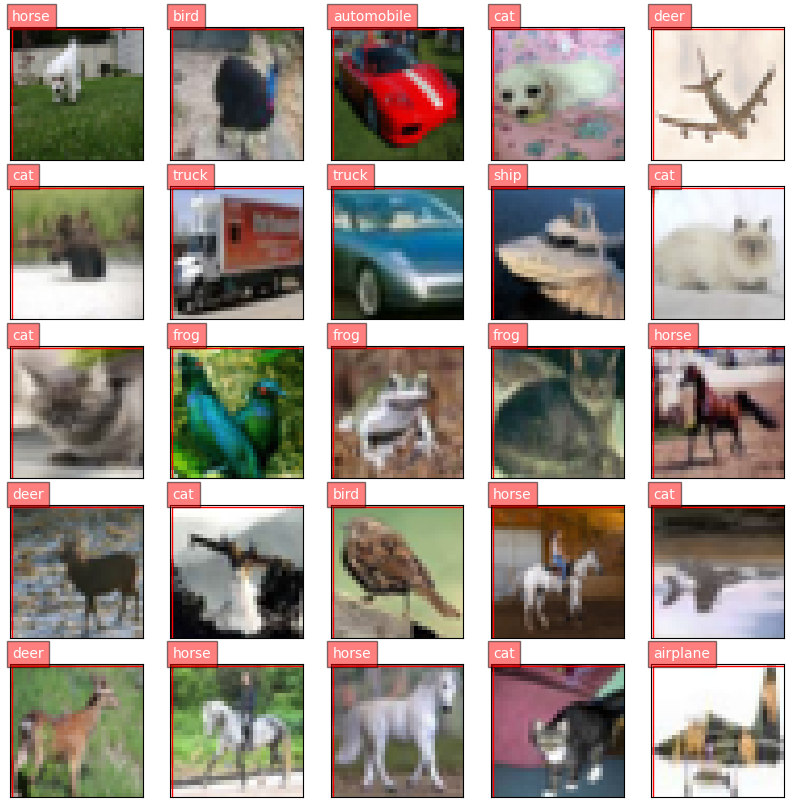

In [10]:
n = 25
indexes = np.random.choice(range(len(predictions)), size=n, replace=False)
images = x_test[indexes]
labels = y_test[indexes]
predicted_labels = np.argmax(predictions[indexes], axis=1)
predicted_class_names = [class_names[label] for label in predicted_labels]
plt.figure(figsize=(10, 10))
for i in range(n):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = images[i]
    label = labels[i][0]
    predicted_class_name = predicted_class_names[i]
    draw_box(image, (0, 0, 32, 32), predicted_class_name)
plt.show()